<a href="https://www.kaggle.com/code/neenues/bankchurndataset-randomforest" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# [Binary Classification with a Bank Churn Dataset](https://www.kaggle.com/competitions/playground-series-s4e1)
### Playground Series - Season 4, Episode 1.
_______________________________________________________________________ 
# Author Details:
- Name: Neenu E S
- Profiles: [Github](https://github.com/neenu05) | [LinkedIn](https://www.linkedin.com/in/neenues/) | [Kaggle](https://www.kaggle.com/neenues)
- Prepared for the submission to the competition.
________________________________________________________________________
# Attributions:
[Walter Reade, Ashley Chow. (2024). Binary Classification with a Bank Churn Dataset . Kaggle.](https://www.kaggle.com/competitions/playground-series-s4e1)
__________________________________________________________________________
# Code Execution : 
- [Execute the notebook in Kaggle](https://www.kaggle.com/code/neenues/bankchurndataset-randomforest/edit/run/160770978)

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
plt.style.use('ggplot')
from mlxtend.plotting import plot_confusion_matrix
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.pipeline import make_pipeline

##### Lets Explore the data

In [6]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [7]:
train_df.shape, test_df.shape

((165034, 14), (110023, 13))

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [9]:
#Checking the dataset description
describe = train_df.describe()
describe.transpose()

,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


In [10]:
train_df.isnull().sum()  ## no null values

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
test_df.isnull().sum()  ## no null values

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [12]:
# Check duplicate values in training data
train_df[train_df.duplicated()]

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [13]:
# Check duplicate values in testing data
test_df[test_df.duplicated()]

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary


Exited
0    130113
1     34921
Name: count, dtype: int64


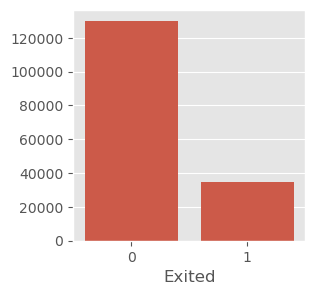

In [14]:
exit_counts = train_df['Exited'].value_counts()
print(exit_counts)
fig, ax = plt.subplots(figsize=(3, 3))
fig = sns.barplot(x= exit_counts.index, y= exit_counts.values, ax=ax)

In [15]:
# Remove Id Column
train_df.drop(['id'], axis=1, inplace=True)
train_df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

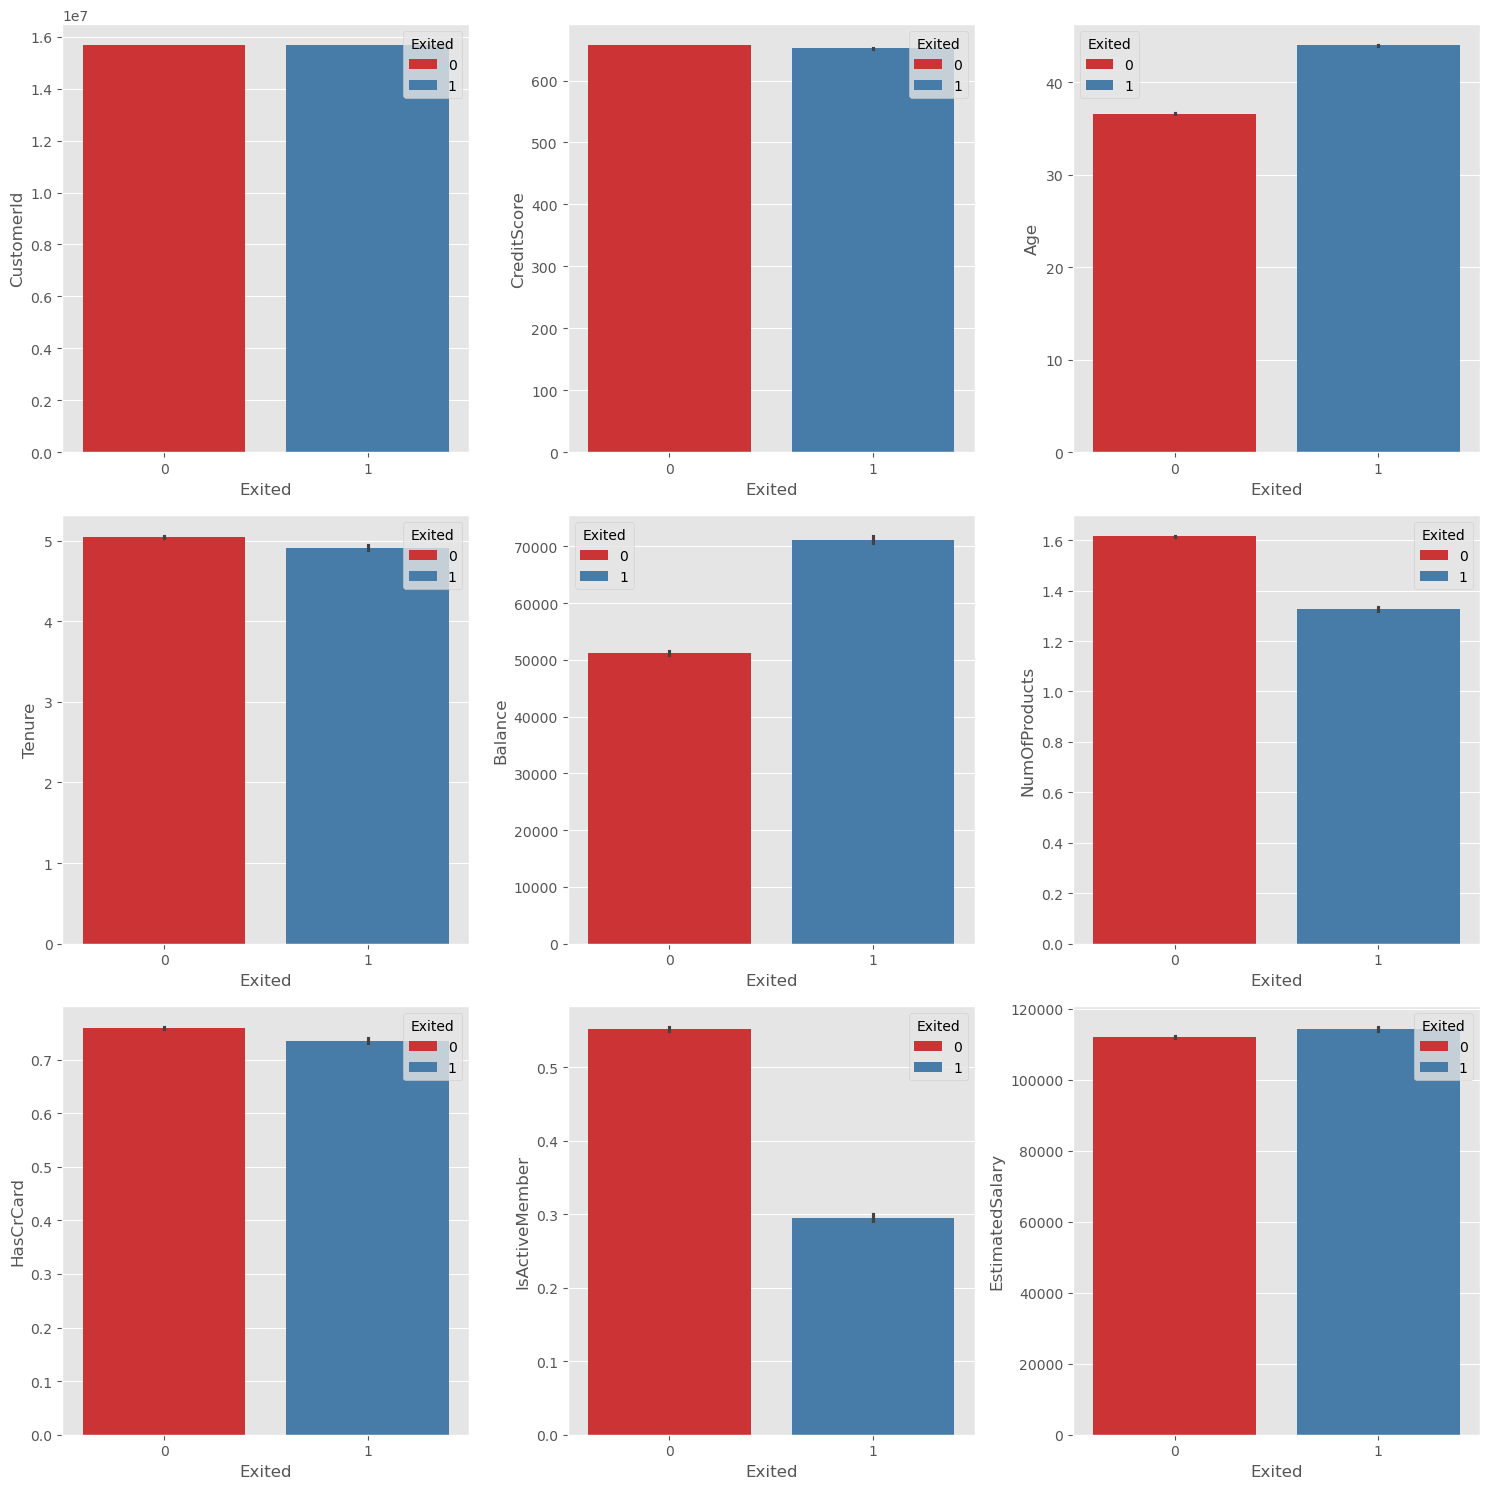

In [16]:
##checking the Exited for numerical column
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (15,15))

sns.barplot(x="Exited", y='CustomerId', hue="Exited", data=train_df, ax= ax[0,0], palette='Set1')
sns.barplot(x="Exited", y='CreditScore', palette='Set1', data=train_df, ax= ax[0,1],  hue="Exited")
sns.barplot(x="Exited", y='Age', hue="Exited", data=train_df, ax= ax[0,2], palette='Set1')
sns.barplot(x="Exited", y='Tenure', palette='Set1', data=train_df, ax= ax[1,0],  hue="Exited")
sns.barplot(x="Exited", y='Balance', hue="Exited", data=train_df, ax= ax[1,1], palette='Set1')
sns.barplot(x="Exited", y='NumOfProducts', hue="Exited", data=train_df, ax= ax[1,2], palette='Set1')
sns.barplot(x="Exited", y='HasCrCard', hue="Exited", data=train_df, ax= ax[2,0], palette='Set1')
sns.barplot(x="Exited", y='IsActiveMember', hue="Exited", data=train_df, ax= ax[2,1], palette='Set1')
sns.barplot(x="Exited", y='EstimatedSalary', hue="Exited", data=train_df, ax= ax[2,2], palette='Set1')


plt.tight_layout()
plt.show()

#### Data Modelling and training

In [17]:
test_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [18]:
ids = test_df['id']

In [19]:
# Remove Id Column
test_df.drop(['id'], axis=1, inplace=True)
test_df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary'],
      dtype='object')

In [20]:
test_df.shape,train_df.shape

((110023, 12), (165034, 13))

In [21]:
test_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [22]:
train_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [23]:
X=train_df.iloc[:,1:-1].values #  first and last columns not inculded
y=train_df.iloc[:,-1].values  # only last - target

X_test=test_df.iloc[:,1:].values  # first  column not inculded

In [24]:
#Data Modeling
#Train Test Split

x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)
#print(x_train.shape, x_test.shape)

In [25]:
#""" convert to numberical values
for i in range(x_train.shape[1]):
    le = LabelEncoder()
    x_test[:,i] = le.fit_transform(x_test[:, i])
    x_train[:,i] = le.fit_transform(x_train[:, i])
    
    X_test[:,i] = le.fit_transform(X_test[:, i])

In [26]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [27]:
#scale variables in X to ensure same scale
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

X_test = ss.transform(X_test)

In [28]:
accuracy_list = []
precision_all = []
recall_all = []  
f1_score_all = []
train_accuracy = []
test_accuracy = []
roc_accuracy = []

### RandomForesstClassifier

In [29]:
# RandomForestClassifier

r_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
r_clf.fit(x_train, y_train)
r_clf_pred = r_clf.predict(x_test)

r_clf_acc = accuracy_score(y_test, r_clf_pred)
accuracy_list.append(100*r_clf_acc)


In [30]:
# Confusion Matrix Evaluation Metrics
# Let's evaluate the model using classification_report for accuracy, precision, and recall.
print("Accuracy: {:.2f}%".format(100*r_clf_acc))

target_names = ['Not Exited', 'Exited']
print("Classification Report \n", classification_report(y_test, r_clf_pred, target_names=target_names))

r_clf_prec, r_clf_recall, r_clf_f1, r_clf_supp = score(y_test, r_clf_pred)
precision_all.append(100*r_clf_prec[1])
recall_all.append(100*r_clf_recall[1])
f1_score_all.append(100*r_clf_f1[1])


Accuracy: 85.94%
Classification Report 
               precision    recall  f1-score   support

  Not Exited       0.87      0.97      0.92     26011
      Exited       0.78      0.47      0.58      6996

    accuracy                           0.86     33007
   macro avg       0.83      0.72      0.75     33007
weighted avg       0.85      0.86      0.85     33007



In [31]:
#Receiver Operating Characteristic(ROC) curve

r_clf_pred_proba = r_clf.predict_proba(x_test)[::,1]
fpr5, tpr5, thresholds5 = roc_curve(y_test, r_clf_pred_proba)
auc5 = roc_auc_score(y_test, r_clf_pred_proba)

roc_accuracy.append(100*auc5)

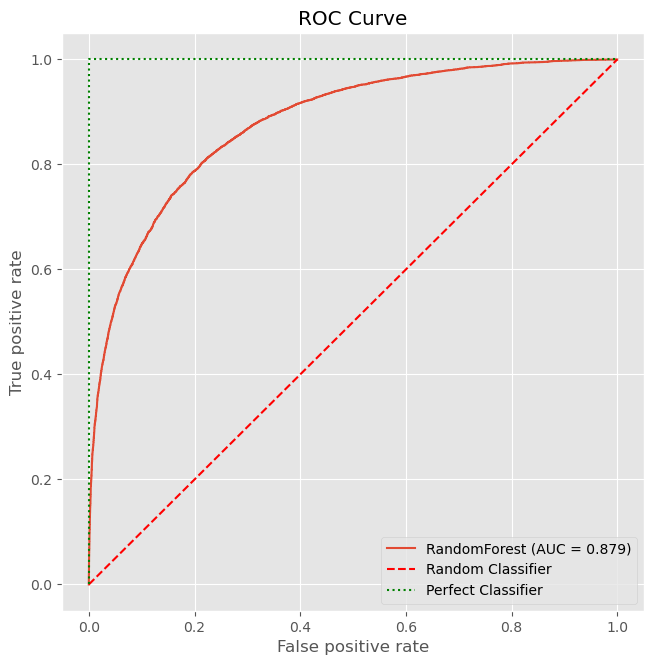

In [32]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
plt.plot(fpr5, tpr5, label='RandomForest (AUC = %0.3f)' % (auc5))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [42]:
model_list = ['RandomForest']


dict = {'Accuracy': np.round(accuracy_list, 3), 
        'Precision': np.round(precision_all, 3), 
        'Recall': np.round(recall_all, 3), 
        'F1-score':np.round(f1_score_all, 3), 
        'ROC ACU':np.round(roc_accuracy, 3)} 
    
result = pd.DataFrame(dict, index = model_list)
    
result

,Accuracy,Precision,Recall,F1-score,ROC ACU
RandomForest,85.942,78.317,46.569,58.408,87.872


### Prediction on Test Data

In [34]:
# predict on test dataset
y_pred = r_clf.predict(X_test)
y_pred_proba = r_clf.predict_proba(X_test)[:,1] 

In [35]:
# Combine Predictions with IDs for the expected output
outr_df = pd.DataFrame({'id': ids, 'Exited': np.round(y_pred_proba)}) #np.round(y_pred_proba, 1)
outr_df.head()

,id,Exited
0,165034,0.0
1,165035,1.0
2,165036,0.0
3,165037,0.0
4,165038,0.0


In [36]:
outr_df['Exited'] = outr_df['Exited'].apply(np.int32)

In [37]:
# Save the predictions to a CSV file
outr_df.to_csv('output.csv', index=False)

Exited
0    92705
1    17318
Name: count, dtype: int64


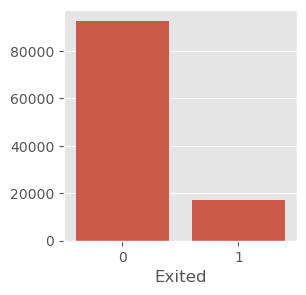

In [38]:
exit_counts = outr_df['Exited'].value_counts()
print(exit_counts)
fig, ax = plt.subplots(figsize=(3, 3))
fig = sns.barplot(x= exit_counts.index, y= exit_counts.values, ax=ax)